# **Used Car Retail Price Recommendation**
----
**Final Capstone Project - Dibimbing Machine Learning Batch 3**

**by Reinhard Jonathan Silalahi**

### **Requirement installation**

In [1]:
!pip install -r requirements.txt

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pandas as pd

from sklearn.utils import shuffle 

### **Connect to PostgreSQL Database and Load Data**

In [3]:
# Define the database connection parameters
username = 'postgres'
password = 'password'
host = 'localhost'
port = '5432'  # Default PostgreSQL port
database = 'db_scrapper'

# Create the database connection
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

# Query to get the data
query = '''
select 
	scrapper.id,
	brand.name as brand, 
	model.name as model, 
	type.name as type, 
	color.name as color,
	year, 
	mileage, 
	transmission, 
	engine_capacity, 
	condition,
    price,
	province, 
	region,
    scrapper.data_source
from scrapper
join brand on scrapper.brand_id = brand.id
join model on scrapper.model_id = model.id
join type on scrapper.type_id = type.id
join color on scrapper.color_id = color.id
'''

# Load data into a DataFrame
df = pd.read_sql(query, engine)

# Close the connection (if necessary)
engine.dispose()

In [4]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886824 entries, 0 to 886823
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               886824 non-null  object 
 1   brand            886824 non-null  object 
 2   model            886824 non-null  object 
 3   type             886824 non-null  object 
 4   color            886824 non-null  object 
 5   year             886824 non-null  int64  
 6   mileage          886824 non-null  int64  
 7   transmission     886824 non-null  object 
 8   engine_capacity  886824 non-null  int64  
 9   condition        886824 non-null  object 
 10  price            886824 non-null  float64
 11  province         886709 non-null  object 
 12  region           886824 non-null  object 
 13  data_source      886824 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 94.7+ MB
None


In [5]:
# Display the first few rows
print(df.head())

                                     id          brand          model  \
0  17e2c6b5-cf92-4285-9262-a026cc027db8         Toyota  Kijang Innova   
1  aa7929e2-ecef-4f9b-a266-9df16ceb6154  Mercedes-Benz         CLA200   
2  3bcb40f3-a6b9-46bf-b9f2-00d15507fc8d         Toyota           Agya   
3  23a30371-52da-4bd5-bac3-995f80a69eb1        Hyundai          Creta   
4  cf2d3be6-51ac-4c05-a3b0-c53c35d3af2d          Mazda           CX-5   

                     type  color  year  mileage transmission  engine_capacity  \
0                 LAINNYA  Hijau  2005   120000    AUTOMATIC                0   
1               1.6 SPORT  Hitam  2018   105000    AUTOMATIC                0   
2                 LAINNYA  Merah  2015    90000    AUTOMATIC                0   
3  1.5 PRIME IVT TWO TONE  Putih  2022    30000    AUTOMATIC                0   
4             2.5 TOURING  Putih  2016    85000    AUTOMATIC                0   

  condition        price        province     region data_source  
0  USED_

In [6]:
# Display summary statistics
print(df.describe())

                year       mileage  engine_capacity         price
count  886824.000000  8.868240e+05    886824.000000  8.868240e+05
mean     2014.798618  8.005504e+04        13.592801  2.594906e+08
std         6.186048  5.603058e+04       170.667507  4.291223e+08
min      1970.000000  0.000000e+00         0.000000  1.000000e+00
25%      2012.000000  4.000000e+04         0.000000  1.150000e+08
50%      2016.000000  7.000000e+04         0.000000  1.690000e+08
75%      2019.000000  1.100000e+05         0.000000  2.650000e+08
max      2024.000000  2.095000e+06      7545.000000  8.500000e+10


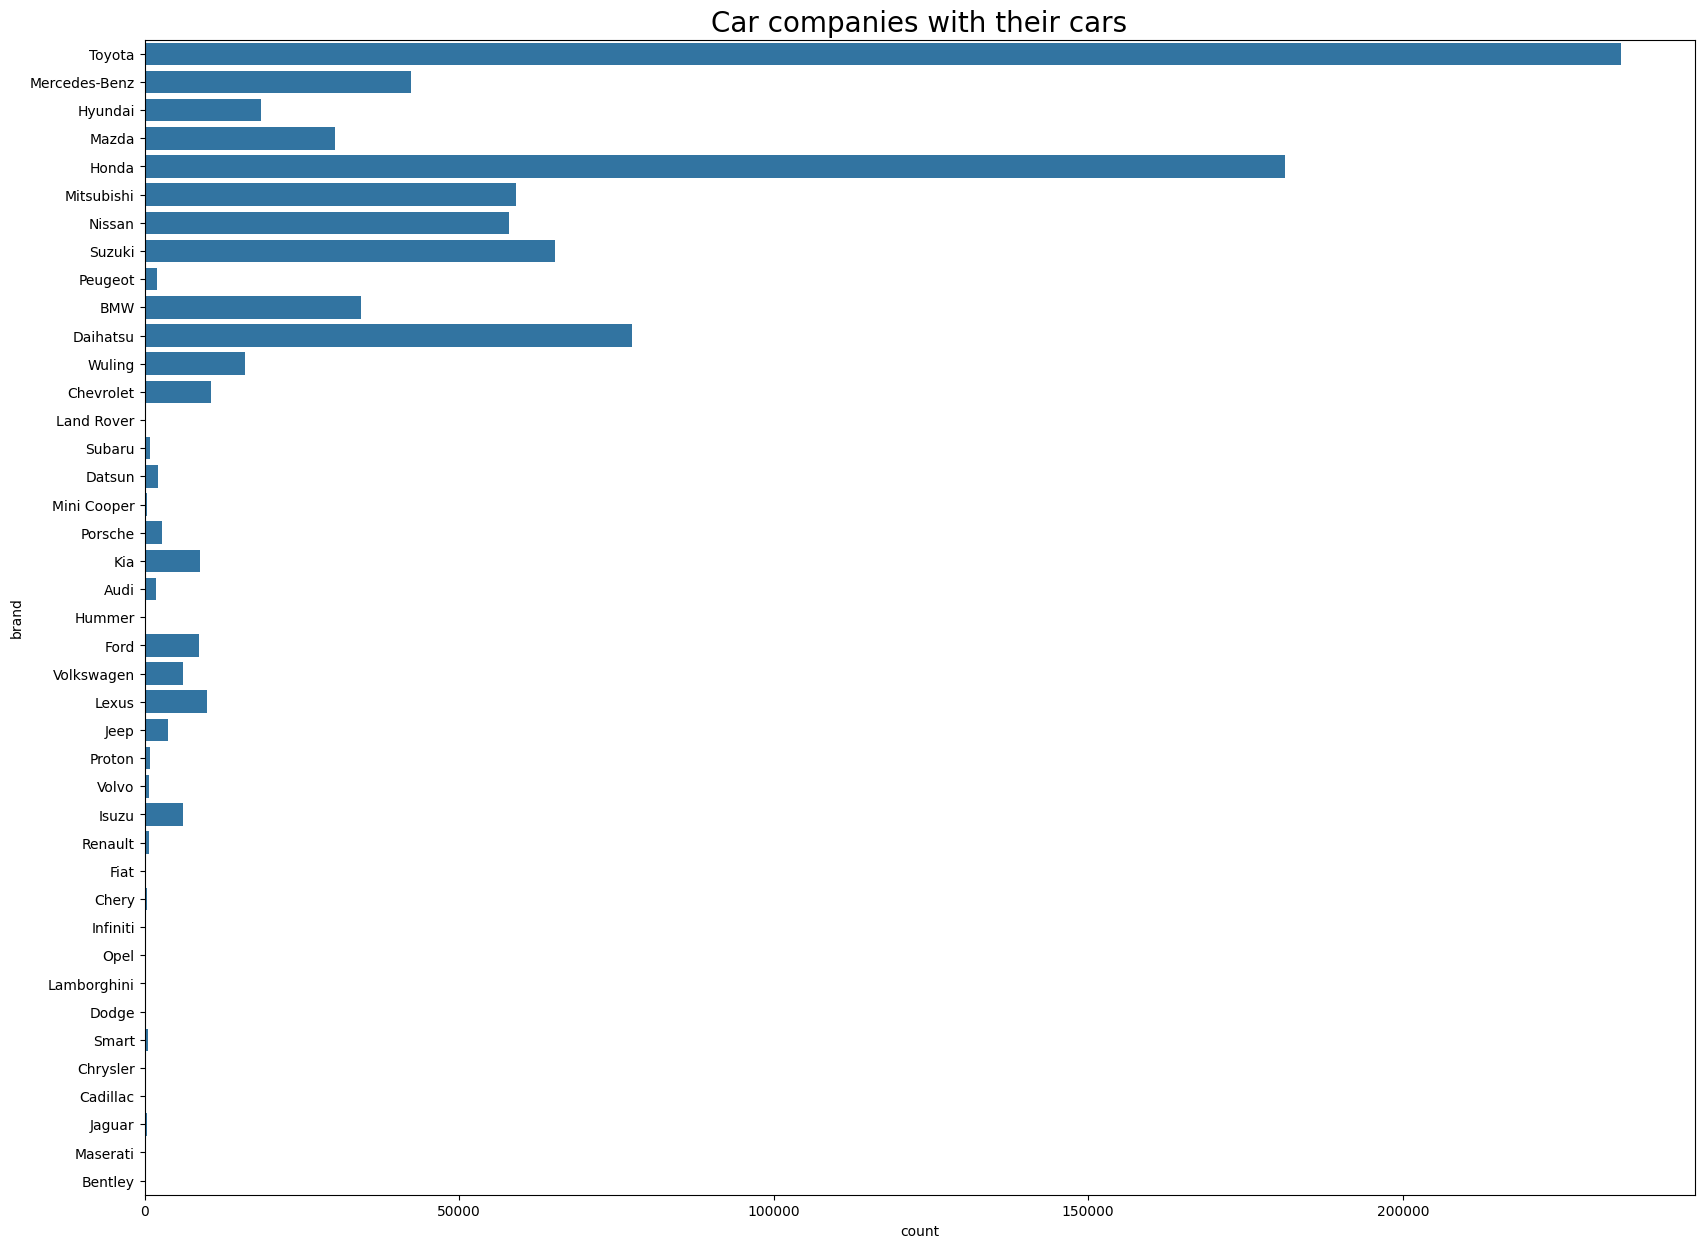

In [7]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df['brand'])
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

### **Data sources**

In [8]:
unique_values = df['data_source'].unique()
print(f"Data sources: {unique_values}")

Data sources: ['OLX' 'CARMUDI']


### **Remove Duplicates**

In [9]:
print("Count before removing duplicate rows: ", df.shape)
beforeDuplicatesDrop = df.duplicated(subset=[col for col in df.columns if col != 'id']).sum()

print("Total duplicate rows: ", beforeDuplicatesDrop)

df = df.drop_duplicates(subset=[col for col in df.columns if col != 'id'])
print("Count after removing duplicate rows: ", df.shape)

Count before removing duplicate rows:  (886824, 14)
Total duplicate rows:  167076
Count after removing duplicate rows:  (719748, 14)


In [10]:
df.isna().sum()

id                   0
brand                0
model                0
type                 0
color                0
year                 0
mileage              0
transmission         0
engine_capacity      0
condition            0
price                0
province           115
region               0
data_source          0
dtype: int64

### **Temporarily do not handle missing value for province column, do it later after data train & test splitting**

In [11]:
# Get boolean DataFrame indicating NaN
na_locations = df.isna()

# Identify rows where any NaN value exists
rows_with_na = na_locations.any(axis=1)

# Filter DataFrame to get rows with NaN values
df_with_na = df[rows_with_na]

# Print the rows with NaN values
print("Rows with NaN values:")
print(df_with_na)

Rows with NaN values:
                                          id   brand          model  \
397     890e2d3b-ca07-44a7-b3ea-84e819222f2e   Honda           Brio   
1214    fb969663-5656-4fac-a662-4a93a1ffa2cb   Honda     Brio Satya   
5777    cb2600bc-d162-49af-92ab-f1f9181fa906   Honda     Brio Satya   
9569    67b39a76-e5ec-4022-bb2c-0fe928deaefb  Toyota           Agya   
16175   2ecff29b-d5bf-4407-b73a-1ee151fdcbd8  Toyota          Calya   
...                                      ...     ...            ...   
238558  24cbace8-d3b7-4ce3-9a49-b8dc18314805  Toyota           Vios   
242250  439e8848-e8dc-4585-9a6f-fbba82e5e287  Wuling        Confero   
253974  6288d835-e849-4d73-ada2-46d7b1200c3f   Honda           HR-V   
264258  388a7845-e475-48f0-bb00-f34aef054225  Toyota  Kijang Innova   
267194  4823e537-32a3-4c66-9b6a-6707f0defbbd  Toyota         Avanza   

                      type   color  year  mileage transmission  \
397           1.3 SPORTS E   Putih  2013   105000    AUTOMA

### **Handling Missing and Wrong Value**

In [12]:
contains_zero = (df['engine_capacity'] == 0).any()

print(contains_zero)

if contains_zero:
    print("The 'engine_capacity' column contains zero values.")
    
    # Calculate the number of zero values
    zero_count = (df['engine_capacity'] == 0).sum()
    
    print(f"Number of zero values in 'engine_capacity': {zero_count}")
    
    # Calculate the percentage of zero values
    zero_percentage = (zero_count / len(df)) * 100
    
    print(f"Percentage of zero values: {zero_percentage:.2f}%")
else:
    print("The 'engine_capacity' column does not contain any zero values.")

True
The 'engine_capacity' column contains zero values.
Number of zero values in 'engine_capacity': 713817
Percentage of zero values: 99.18%


**Because zero missing value on 'engine_capacity' percentage is more than 20%, then drop it**

In [13]:
if 'engine_capacity' in df.columns:
    df = df.drop(columns=['engine_capacity'])
    print(f"Column '{'engine_capacity'}' has been dropped.")

Column 'engine_capacity' has been dropped.


### **Fix wrong condition type, based on the mileage**

In [14]:
count = ((df['mileage'] != 0) & (df['condition'] == 'NEW_CAR')).sum()

print(f"Number of rows where mileage != 0 and condition is NEW_CAR: {count}")

Number of rows where mileage != 0 and condition is NEW_CAR: 484


In [15]:
# Update car_type to 'USED_CAR' for non-zero mileage
df.loc[df['mileage'] > 0, 'condition'] = 'USED_CAR'

In [16]:
count = ((df['mileage'] == 0) & (df['condition'] == 'USED_CAR')).sum()

print(f"Number of rows where mileage == 0 and condition is USED_CAR: {count}")

Number of rows where mileage == 0 and condition is USED_CAR: 74


In [17]:
# Update car_type to 'NEW_CAR' for zero mileage
df.loc[df['mileage'] == 0, 'condition'] = 'NEW_CAR'

In [18]:
count = ((df['mileage'] != 0) & (df['condition'] == 'NEW_CAR')).sum()
print(f"Number of rows where mileage != 0 and condition is NEW_CAR: {count}")

count = ((df['mileage'] == 0) & (df['condition'] == 'USED_CAR')).sum()
print(f"Number of rows where mileage == 0 and condition is USED_CAR: {count}")

Number of rows where mileage != 0 and condition is NEW_CAR: 0
Number of rows where mileage == 0 and condition is USED_CAR: 0


In [19]:
shuffled_data = shuffle(df, random_state = 100)
# X = shuffled_data.drop(['price'], axis = 1)
# y = shuffled_data['price']

### **Split Train & Test**

In [20]:
from sklearn.model_selection import train_test_split
train_car, test_car = train_test_split(shuffled_data, test_size = 0.2, random_state=42)

In [21]:
# untuk plot Q-Q
import scipy.stats as stats

def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### **Handle the previous missing value**

In [22]:
train_car[train_car['province'].isna()].head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source
156744,e0562def-b9f9-4ee3-a2a5-2ba422155844,Toyota,Rush,1.5 G,Hitam,2013,95000,MANUAL,USED_CAR,128000000.0,None,Indonesia,OLX
61609,eac52fc4-9760-4add-996a-db2173636cd4,Toyota,Avanza,1.3 G,Silver,2008,140000,MANUAL,USED_CAR,85000000.0,None,Indonesia,OLX
221675,cad9ae63-8b18-4bb5-8856-67a8f530b5dc,Daihatsu,Gran max,1.3 BOX,Silver,2015,5000,MANUAL,USED_CAR,73000000.0,None,Indonesia,OLX
214106,977bc5c4-0d05-4948-8385-731c7384e7e6,Toyota,Lain-lain,LAIN-LAIN,Hitam,2020,85000,MANUAL,USED_CAR,210000000.0,None,Indonesia,OLX
219169,41694050-248b-460e-8b69-456e5df290f2,Daihatsu,Xenia,1.3 R SPORTY,Putih,2016,35000,MANUAL,USED_CAR,137000000.0,None,Indonesia,OLX


In [23]:
train_mode_province = train_car[~train_car['province'].isna()]['province'].mode()[0]
train_mode_province # this is the modus or the most frequency province

'Jakarta D.K.I.'

In [24]:
# Apply the missing value province, with the modus province
train_car['province'] = train_car['province'].apply(lambda x: train_mode_province if pd.isna(x) else x)

test_car['province'] = test_car['province'].apply(lambda x: train_mode_province if pd.isna(x) else x)

In [25]:
# Expected that no more missing value of province
train_car[train_car['province'].isna()].head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source


In [26]:
# Expected that no more missing value of province
test_car[test_car['province'].isna()].head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source


### **Handling Outliers**

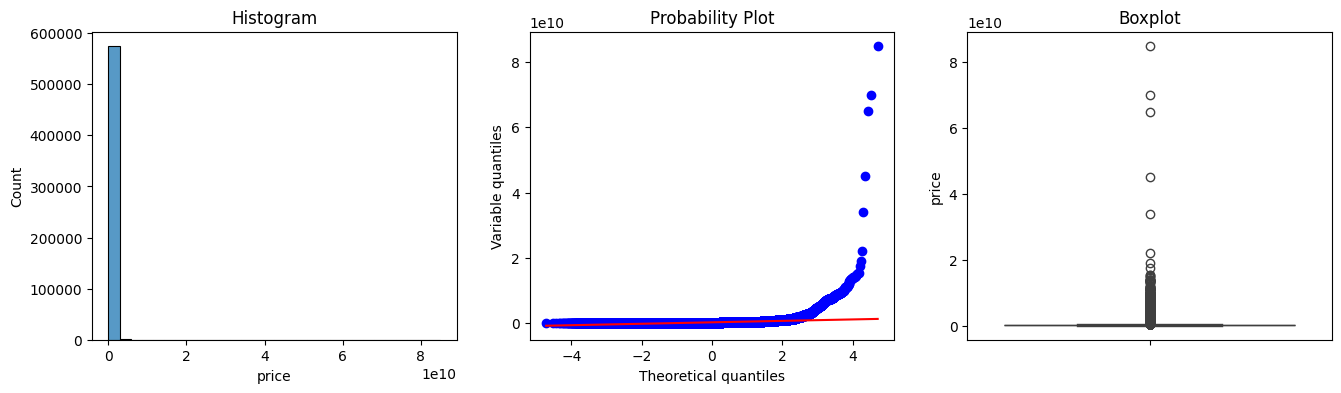

In [27]:
check_plot(train_car, 'price')

In [28]:
# Find the index of the row with the maximum price
max_price_index = train_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = train_car.loc[max_price_index]

print(row_with_max_price)

id              d8566590-fa87-4912-9a40-e5424f11ef7d
brand                                       Daihatsu
model                                          Xenia
type                                    1.3 R DELUXE
color                                        Abu-abu
year                                            2009
mileage                                       120000
transmission                                  MANUAL
condition                                   USED_CAR
price                                  85000000000.0
province                                        Riau
region                                     Indonesia
data_source                                      OLX
Name: 311168, dtype: object


In [29]:
# Find the index of the row with the maximum price
max_price_index = test_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = test_car.loc[max_price_index]

print(row_with_max_price)

id              78262832-514f-4d0b-94db-37c2d0bb2f5b
brand                                  Mercedes-Benz
model                                         AMG GT
type                                           4.0 R
color                                          Hitam
year                                            2021
mileage                                         5000
transmission                               AUTOMATIC
condition                                   USED_CAR
price                                  15500000000.0
province                              Jakarta D.K.I.
region                                     Indonesia
data_source                                      OLX
Name: 194984, dtype: object


In [30]:
# Function to identify and handle outliers based on IQR
def handle_outliers_iqr(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Convert outliers to the nearest bound
    group['price'] = group['price'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return group

# Apply the outlier handling function to each group
train_car = train_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)

print("DataFrame with outliers handled:")
print(train_car)

/tmp/ipykernel_21910/3362087896.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_car = train_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)


DataFrame with outliers handled:
                                          id   brand  model  \
0       08b61c87-6b06-48d2-b90b-ca128484684c    Audi     A3   
1       a01969a8-6cd8-4cb4-a572-e51467d32fe4    Audi     A3   
2       20e02bbd-6cc5-4a17-b074-8f504a3795bd    Audi     A3   
3       59f61a1f-febb-4508-881e-7c748863d626    Audi     A3   
4       17603f16-fbff-41d4-b61b-285633dcd2de    Audi     A3   
...                                      ...     ...    ...   
575793  2a8ce34b-09de-4eab-8f21-ee744f757a20  Wuling  Formo   
575794  a53a5c41-c963-49f4-b5d5-a05176b2b779  Wuling  Formo   
575795  4186ebec-9fff-44d9-b7ac-875acb4b1f0e  Wuling  Formo   
575796  985b55d1-8027-4ebe-9fb2-087c1aea0b1c  Wuling  Formo   
575797  aa74d109-a0a8-4f9d-a595-3bcf6ac85f46  Wuling  Formo   

                       type    color  year  mileage transmission condition  \
0        1.2 SPORTBACK TFSI   Kuning  2017    65000    AUTOMATIC  USED_CAR   
1        1.2 SPORTBACK TFSI    Merah  2017    20000   

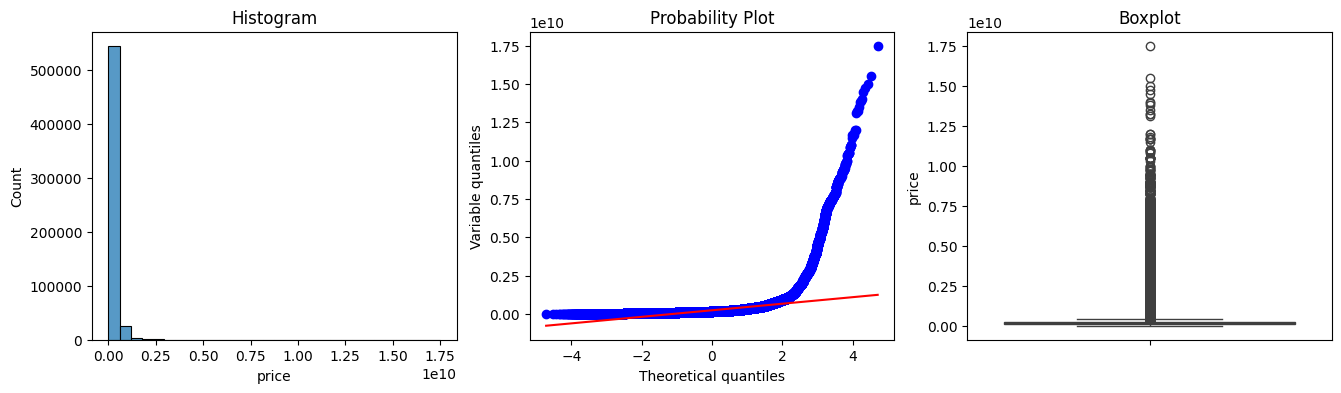

In [31]:
check_plot(train_car, 'price')

In [32]:
# Find the index of the row with the maximum price
max_price_index = train_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = train_car.loc[max_price_index]

print(row_with_max_price)

id              58d44778-9ff5-4f0c-9d0c-df508691331f
brand                                    Lamborghini
model                                      Lain-lain
type                                       LAIN-LAIN
color                                        Abu-abu
year                                            2022
mileage                                         5000
transmission                               AUTOMATIC
condition                                   USED_CAR
price                                  17500000000.0
province                              Jakarta D.K.I.
region                                     Indonesia
data_source                                      OLX
Name: 233888, dtype: object


### Check whether the train data outlier is handled correctly

Checking for specific group, for example 'Mercedes Benz, AMG GT, 4.0S'

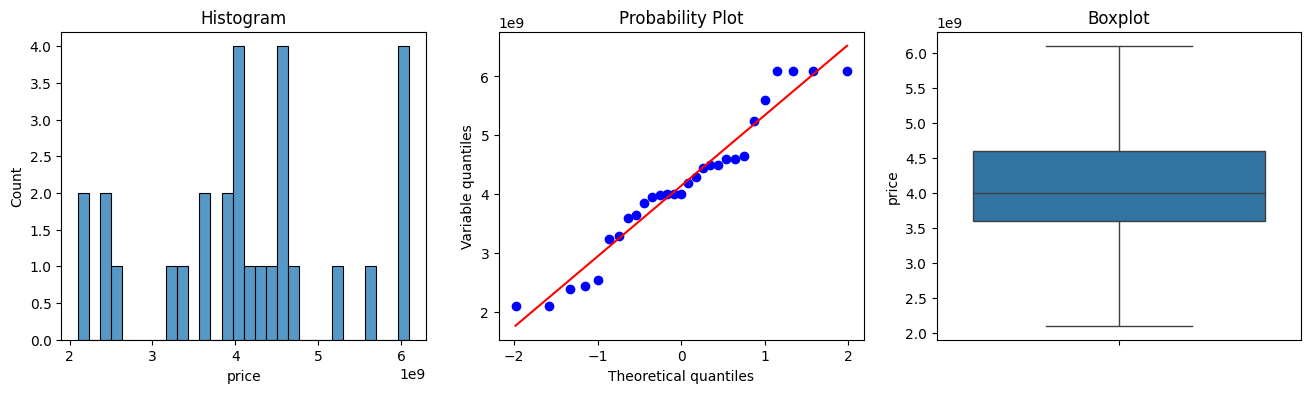

In [33]:
# Filter the DataFrame
filtered_df = train_car[
    (train_car['brand'] == 'Mercedes-Benz') &
    (train_car['model'] == 'AMG GT') &
    (train_car['type'] == '4.0 S')
]

num_of_rows = filtered_df.shape[0]
num_of_rows

check_plot(filtered_df, 'price')

### **Handle test data outlier (Optional)**

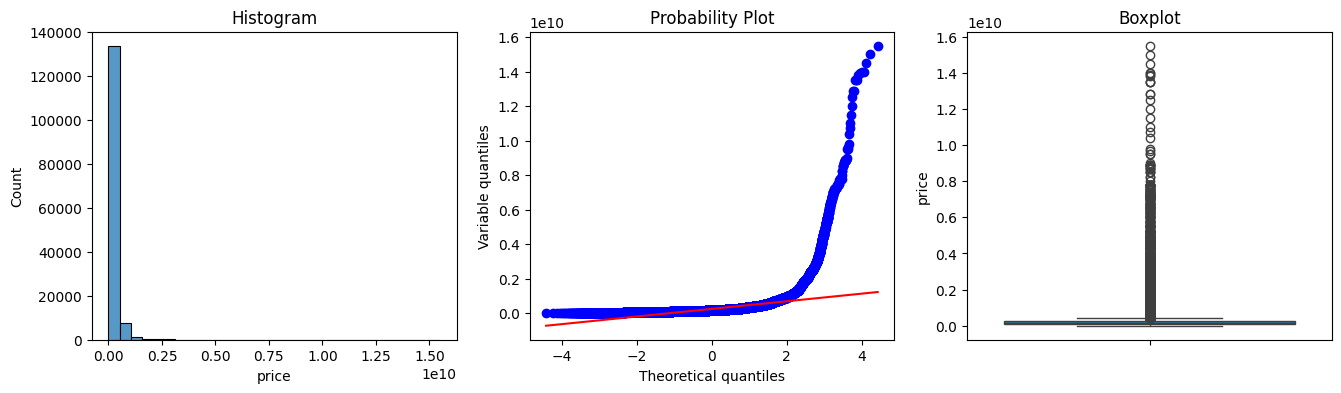

In [34]:
check_plot(test_car, 'price')

In [35]:
# Apply the outlier handling function to each group
test_car = test_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)

print("DataFrame with outliers handled:")
print(test_car)

DataFrame with outliers handled:
                                          id   brand  model  \
0       14e3a6ef-a1d6-4288-8cbe-e7df46df7ea9    Audi     A3   
1       9c501c4d-26fa-406e-a2e5-0b30d006c31f    Audi     A3   
2       27baaa5f-325b-4b00-961d-ea8fd83e70cb    Audi     A3   
3       838d0b0b-e456-401e-90ff-f8a16edf132e    Audi     A3   
4       1425caba-84a1-4f96-9f83-75722311fc5d    Audi     A3   
...                                      ...     ...    ...   
143945  c6154564-5ffe-4939-9a72-a14ac810584e  Wuling  Formo   
143946  9ba71fe0-961f-42d8-9da6-64daddc60233  Wuling  Formo   
143947  e017a1c9-66e8-412b-8665-4b09cac8065c  Wuling  Formo   
143948  0498c722-936d-4344-8fd9-313e0b347950  Wuling  Formo   
143949  58ccda0a-a002-4ab5-8291-ccf2e4890f19  Wuling  Formo   

                       type    color  year  mileage transmission condition  \
0        1.2 TFSI SPORTBACK    Merah  2017    15000    AUTOMATIC  USED_CAR   
1        1.2 TFSI SPORTBACK    Merah  2017    10000   

/tmp/ipykernel_21910/493655800.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_car = test_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)


In [36]:
# Find the index of the row with the maximum price
max_price_index = test_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = test_car.loc[max_price_index]

print(row_with_max_price)

id              78262832-514f-4d0b-94db-37c2d0bb2f5b
brand                                  Mercedes-Benz
model                                         AMG GT
type                                           4.0 R
color                                          Hitam
year                                            2021
mileage                                         5000
transmission                               AUTOMATIC
condition                                   USED_CAR
price                                  15500000000.0
province                              Jakarta D.K.I.
region                                     Indonesia
data_source                                      OLX
Name: 64508, dtype: object


**The max price for test price is now changed, previously max price is 'Mercedes Benz, AMG GT, 4.0S' with price 19.000.000.000**

**Now the max price is the 'Porsche 911 Carera S' which more make sense for sport car**

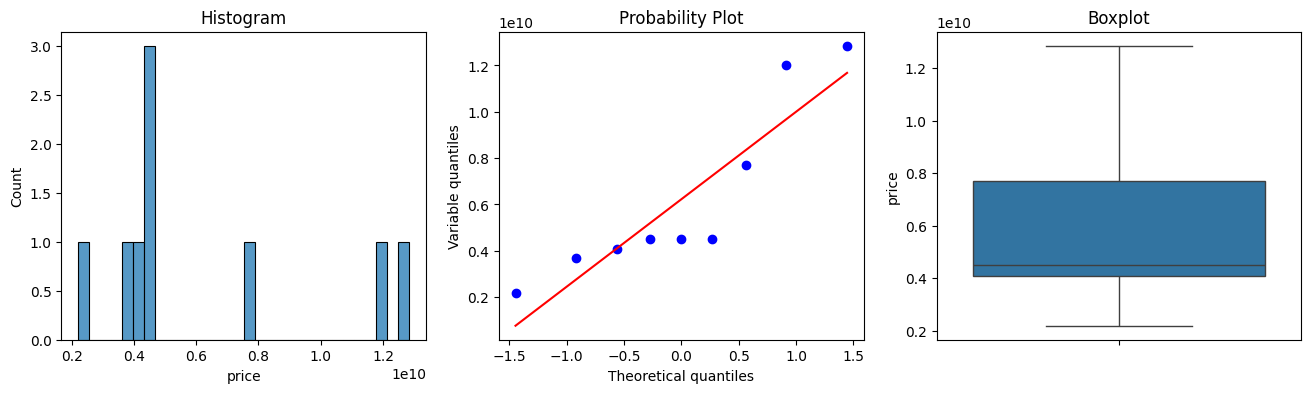

In [37]:
# Filter the DataFrame
filtered_df = test_car[
    (test_car['brand'] == 'Mercedes-Benz') &
    (test_car['model'] == 'AMG GT') &
    (test_car['type'] == '4.0 S')
]

num_of_rows = filtered_df.shape[0]
num_of_rows

check_plot(filtered_df, 'price')

### **Encoding**

In [38]:
train_car['brand'].unique()

array(['Audi', 'BMW', 'Bentley', 'Cadillac', 'Chery', 'Chevrolet',
       'Chrysler', 'Daihatsu', 'Datsun', 'Dodge', 'Fiat', 'Ford', 'Honda',
       'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mini Cooper', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Porsche', 'Proton', 'Renault', 'Smart', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'Wuling'], dtype=object)

In [39]:
import datetime

# Calculate age from the year
train_car['age'] = datetime.datetime.now().year - train_car['year']
test_car['age'] = datetime.datetime.now().year - test_car['year']

In [40]:
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

In [41]:
# Split the train dataframe into features (X) and target (y)
X_train = train_car.drop('price', axis=1)
y_train = train_car['price']

# Split the test dataframe into features (X) and target (y)
X_test = test_car.drop('price', axis=1)
y_test = test_car['price']

In [42]:
# Apply One-Hot Encoding for transmission and condition
ohe_cols = ['transmission', 'condition']

encoder = OneHotEncoder()
encoder.fit(X_train[ohe_cols])

one_hot_encoded_output_train = encoder.transform(X_train[ohe_cols])
one_hot_encoded_output_test = encoder.transform(X_test[ohe_cols])

In [43]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [44]:
X_train.drop(ohe_cols, axis = 1, inplace = True)
X_test.drop(ohe_cols, axis = 1, inplace = True)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575798 entries, 0 to 575797
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              575798 non-null  object
 1   brand           575798 non-null  object
 2   model           575798 non-null  object
 3   type            575798 non-null  object
 4   color           575798 non-null  object
 5   year            575798 non-null  int64 
 6   mileage         575798 non-null  int64 
 7   province        575798 non-null  object
 8   region          575798 non-null  object
 9   data_source     575798 non-null  object
 10  age             575798 non-null  int64 
 11  transmission_1  575798 non-null  int64 
 12  transmission_2  575798 non-null  int64 
 13  condition_1     575798 non-null  int64 
 14  condition_2     575798 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 65.9+ MB


In [46]:
# ['brand', 'model', 'type', 'color', 'province', 'region']
encoder = TargetEncoder(cols = ['brand', 'model', 'type', 'color', 'province', 'region'])

# Fit and transform the encoder on the training data
X_train_encoded = encoder.fit_transform(X_train, y_train)

# Transform the test data using the fitted encoder
X_test_encoded = encoder.transform(X_test)

### **Standardization and Normalization of data**

In [47]:
X_train = X_train_encoded.drop(['id', 'data_source'], axis=1)
X_train.head()

,brand,model,type,color,year,mileage,province,region,age,transmission_1,transmission_2,condition_1,condition_2
0,4.635814e+08,2.651941e+08,2.474463e+08,3.463650e+08,2017,65000,3.275145e+08,2.350941e+08,7,1,0,1,0
1,4.635814e+08,2.651941e+08,2.474463e+08,1.883952e+08,2017,20000,3.275145e+08,2.350941e+08,7,1,0,1,0
2,4.635814e+08,2.651941e+08,2.474463e+08,2.889599e+08,2004,110000,2.218056e+08,2.350941e+08,20,0,1,1,0
3,4.635814e+08,2.651941e+08,2.831612e+08,1.883952e+08,2018,15000,3.275145e+08,2.350941e+08,6,1,0,1,0
4,4.635814e+08,2.651941e+08,2.831612e+08,1.883952e+08,2023,20000,3.275145e+08,2.350941e+08,1,1,0,1,0


In [48]:
X_test = X_test_encoded.drop(['id', 'data_source'], axis=1)
X_test.head()

,brand,model,type,color,year,mileage,province,region,age,transmission_1,transmission_2,condition_1,condition_2
0,4.635814e+08,2.651941e+08,2.831612e+08,1.883952e+08,2017,15000,3.275145e+08,2.350941e+08,7,1,0,1,0
1,4.635814e+08,2.651941e+08,2.831612e+08,1.883952e+08,2017,10000,3.275145e+08,2.350941e+08,7,1,0,1,0
2,4.635814e+08,2.651941e+08,2.831612e+08,2.597477e+08,2017,35000,3.275145e+08,2.350941e+08,7,1,0,1,0
3,4.635814e+08,2.651941e+08,1.325580e+08,1.883952e+08,2016,15000,2.218056e+08,2.350941e+08,8,1,0,1,0
4,4.635814e+08,2.651941e+08,1.325580e+08,1.883952e+08,2016,10000,3.275145e+08,2.350941e+08,8,1,0,1,0


In [49]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_new = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [50]:
X_train.head()

,brand,model,type,color,year,mileage,province,region,age,transmission_1,transmission_2,condition_1,condition_2
0,4.635814e+08,2.651941e+08,2.474463e+08,3.463650e+08,2017,65000,3.275145e+08,2.350941e+08,7,1,0,1,0
1,4.635814e+08,2.651941e+08,2.474463e+08,1.883952e+08,2017,20000,3.275145e+08,2.350941e+08,7,1,0,1,0
2,4.635814e+08,2.651941e+08,2.474463e+08,2.889599e+08,2004,110000,2.218056e+08,2.350941e+08,20,0,1,1,0
3,4.635814e+08,2.651941e+08,2.831612e+08,1.883952e+08,2018,15000,3.275145e+08,2.350941e+08,6,1,0,1,0
4,4.635814e+08,2.651941e+08,2.831612e+08,1.883952e+08,2023,20000,3.275145e+08,2.350941e+08,1,1,0,1,0


In [51]:
X_train_new.head()

,brand,model,type,color,year,mileage,province,region,age,transmission_1,transmission_2,condition_1,condition_2
0,0.066494,0.035211,0.035961,0.775135,0.870370,0.031026,0.310353,0.054767,0.129630,1.0,0.0,1.0,0.0
1,0.066494,0.035211,0.035961,0.171201,0.870370,0.009547,0.310353,0.054767,0.129630,1.0,0.0,1.0,0.0
2,0.066494,0.035211,0.035961,0.555670,0.629630,0.052506,0.128107,0.054767,0.370370,0.0,1.0,1.0,0.0
3,0.066494,0.035211,0.041719,0.171201,0.888889,0.007160,0.310353,0.054767,0.111111,1.0,0.0,1.0,0.0
4,0.066494,0.035211,0.041719,0.171201,0.981481,0.009547,0.310353,0.054767,0.018519,1.0,0.0,1.0,0.0


In [52]:
train_data = pd.concat([X_train_new, y_train], axis=1)
test_data = pd.concat([X_test_new, y_test], axis=1)

### **Feature Selection**

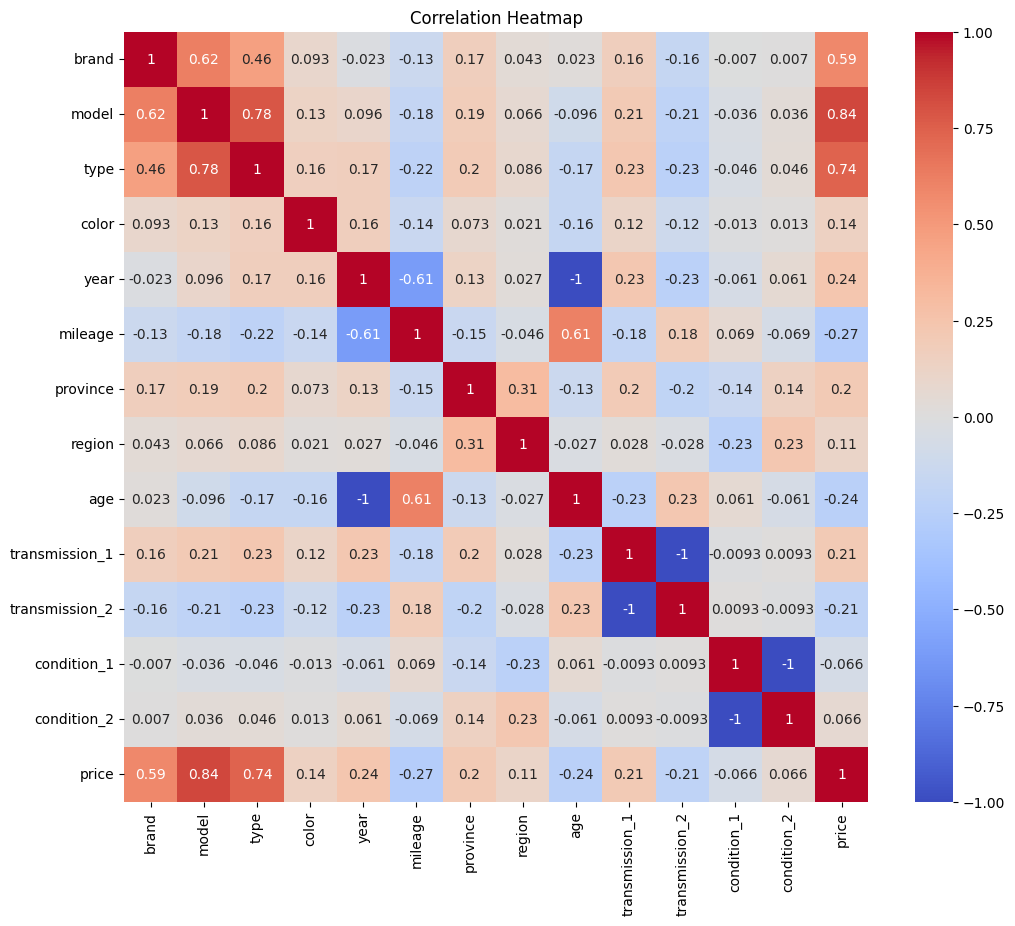

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
correlation_matrix = train_data.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

#### **no need for feature selection, because there is no one above 0.9 (threshold for feature selection)**

### **Save the feature engineered train and data set into csv file**

In [54]:
# Save train_df to CSV
train_data.to_csv('train_data.csv', index=False)

# Save test_df to CSV
test_data.to_csv('test_data.csv', index=False)

print("Train and test data saved to CSV files.")

Train and test data saved to CSV files.


### Showing Example train data

In [55]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

x_train = train_data.drop(columns=['price'], axis=1)
y_train = train_data['price']

In [56]:
x_train.iloc[0]

brand             0.066494
model             0.035211
type              0.035961
color             0.775135
year              0.870370
mileage           0.031026
province          0.310353
region            0.054767
age               0.129630
transmission_1    1.000000
transmission_2    0.000000
condition_1       1.000000
condition_2       0.000000
Name: 0, dtype: float64

In [57]:
y_train.iloc[0]

320000000.0

In [58]:
x_train.iloc[100]

brand             0.066494
model             0.024066
type              0.017198
color             0.044621
year              0.796296
mileage           0.042959
province          0.310353
region            0.054767
age               0.203704
transmission_1    1.000000
transmission_2    0.000000
condition_1       1.000000
condition_2       0.000000
Name: 100, dtype: float64

In [59]:
y_train.iloc[100]

215000000.0